# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работы:**

1. Проанализировать данные на пропуски, ошибки, дубли
2. Проанализировать данные в рамках поставленных задач:

 * Изучить, параметры объектов в данных;

 * Изучить, как быстро продавались квартиры;

 * Узнать, какие факторы больше всего влияют на общую (полную) стоимость объекта;

 * Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;

 * Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Узнать, как стоимость объектов зависит от расстояния до центра города;

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install missingno
 
import missingno as msno
import seaborn as sns
import numpy as np

In [2]:
try:
    df= pd.read_csv(r'C:\Users\Home\ajupyter\Projects\project3_apartment\real_estate_data.csv',sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [1]:
!cd

C:\Users\Home\ajupyter\Projects\project3_apartment


 * Изучим столбцы и их типы

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

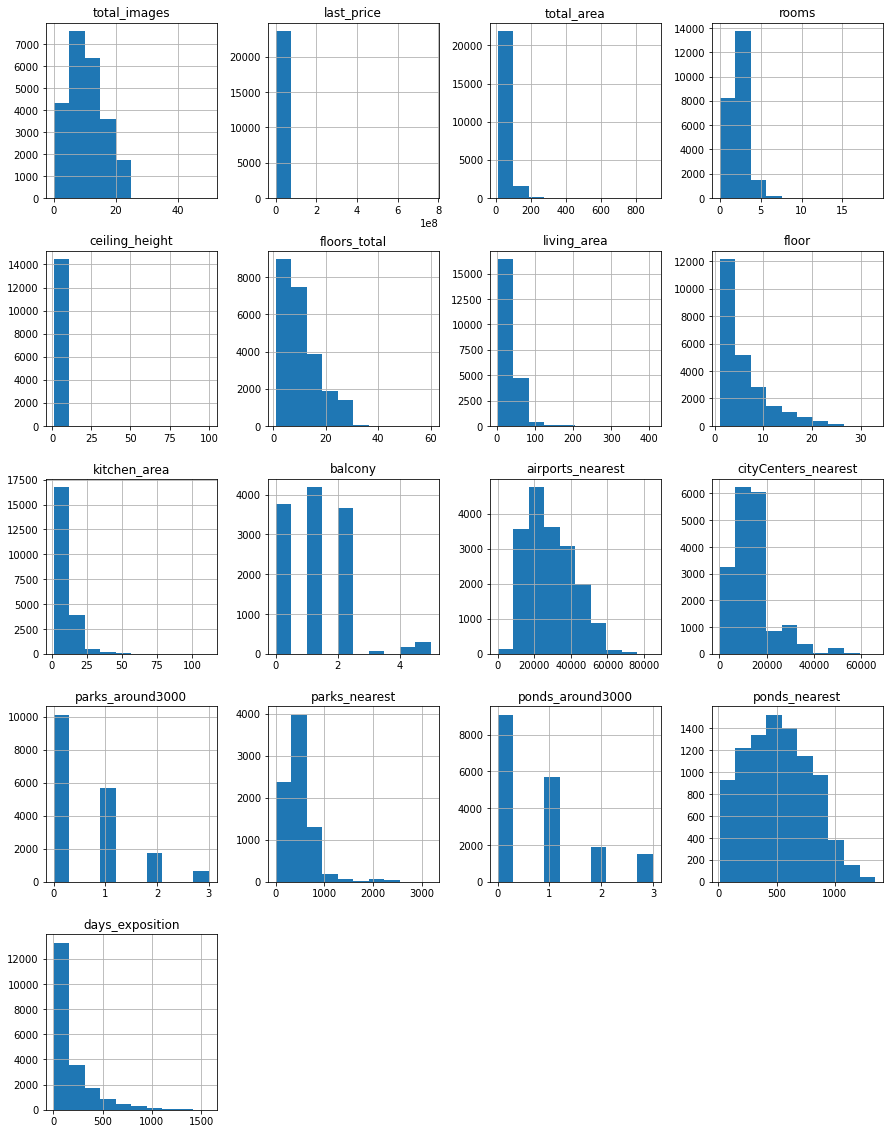

In [7]:
df.hist(figsize=(15, 20))

**Вывод:** 
Обратим внимание на следующее:
1. first_day_exposition - object - должен быть тип datetime
2. ceiling_height - много пропущенных значений
3. floors_total - должен быть тип int, т.к. количество этажей - целое значение, также есть пропущенные значения
4. living_area - есть пропущенные значения
5. is_apartment - должен быть тип bool + нулевые значения, заполнено только 12%
6. kitchen_area - есть пропущенные значения
7. balcony - должен быть тип int, т.к. количество балконов - целое значение, также есть пропущенные значения
8. locality_name - есть пропущенные значения
9. airports_nearest - есть пропущенные значения
10. cityCenters_nearest - есть пропущенные значения
11. parks_around3000 - тип должен быть int + есть пропущенные значения
12. parks_nearest - есть пропущенные значения
13. ponds_around3000 - тип должен быть int + есть пропущенные значения
14. ponds_nearest - есть пропущенные значения
15. days_exposition - тип должен быть int + есть пропущенные значения


## Предобработка данных

### Обработка пропусков

Посмотрим количество и процент пропущенных значений для каждого столбца.

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Визуализируем наши значения, чтобы увидеть, где больше всего пропусков



<AxesSubplot:>

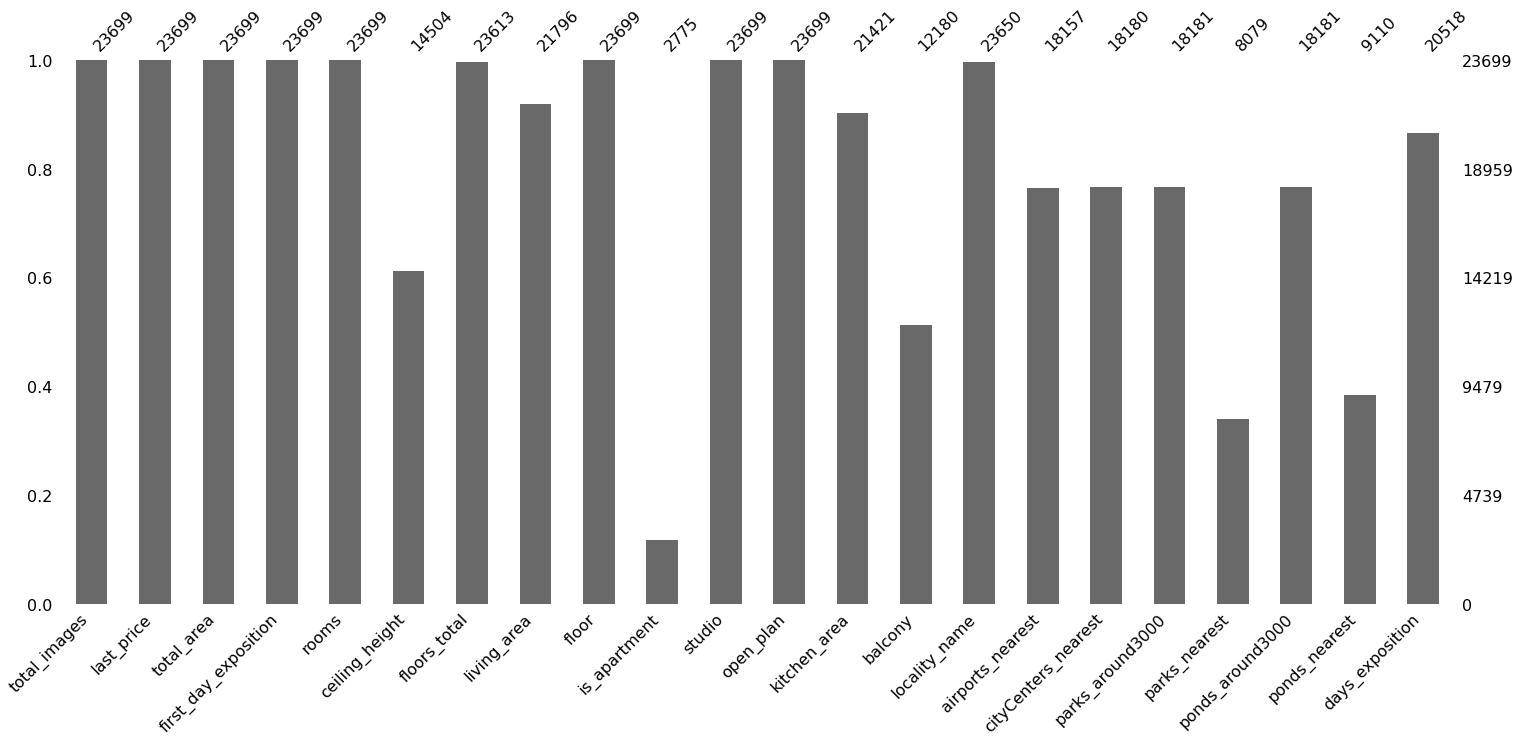

In [10]:
msno.bar(df)

Посмотрим подробнее каждый столбец с пропусками:

#### ceiling_height -высота потолков (м)


In [11]:
#проверим уникальные значения
df['ceiling_height'].value_counts().tail(30)

5.00      1
4.80      1
27.50     1
5.50      1
4.14      1
100.00    1
3.87      1
3.82      1
2.20      1
3.42      1
3.58      1
4.30      1
26.00     1
2.49      1
3.84      1
2.89      1
5.20      1
4.90      1
3.76      1
22.60     1
14.00     1
2.25      1
3.88      1
24.00     1
8.30      1
4.25      1
3.39      1
3.93      1
10.30     1
4.65      1
Name: ceiling_height, dtype: int64

In [3]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
df[df['ceiling_height']>7]['ceiling_height'].value_counts()

8.0      3
14.0     1
100.0    1
10.3     1
8.3      1
Name: ceiling_height, dtype: int64

Есть необоснованно большие значения для высоты потолков и много пропущенных значений 38.8%, наверно, не все считают этот пункт обязательным и просто не предоставляют данные. 
Есть высота потолков и 25 и 32 м,логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м

In [13]:
#заменяем все значения больше 10м
#df['ceiling_height'] = df['ceiling_height'].replace({10.3:1.03,25.0:2.5,32.0:3.2,27.0:2.7,24.0:2.4,26.0:2.6,14.0:1.4,20.0:2.0,22.6:2.26,27.5:2.75,100.0:10.0})    


In [10]:
#рабочий вариант тоже одной строчкой
#df['ceiling_height'] = np.where((df['ceiling_height'] >= 20) & (df['ceiling_height'] <= 30) , df['ceiling_height'] / 10, df['ceiling_height'])
# рабочий вариант через loc
#df.loc[(df['ceiling_height']>=20) & (df['ceiling_height']<=40)] = df['ceiling_height']/10

In [14]:
#проверяем, чтобы у нас не осталось потолков больше 10м
df.loc[df['ceiling_height']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Среднее от медианы не сильно отличается, поэтому заполним пропущенные значение медианой. Потолки 1 метр вызывают сомнения, заменим их медианой, которая примерно равно стандартной высоте потолков в России. Возьмем значения меньше 2.5, так как по стандарту потолки не могут быть ниже 2.5м

In [15]:
#заполняем медианным значением
for t in df['ceiling_height'].unique():
    df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df.loc[(df['ceiling_height'] == t), 'ceiling_height'].median()

In [16]:
for t in df['ceiling_height'].unique():
    df.loc[df['ceiling_height'] < 2.5, 'ceiling_height'] = df.loc[(df['ceiling_height'] == t), 'ceiling_height'].median()

In [17]:
#проверим чтоб все заполнилолсь
df['ceiling_height'].isna().sum()

0

In [18]:
#проверим как скорректировались данные
df['ceiling_height'].describe()

count    23699.000000
mean         2.718588
std          0.232919
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

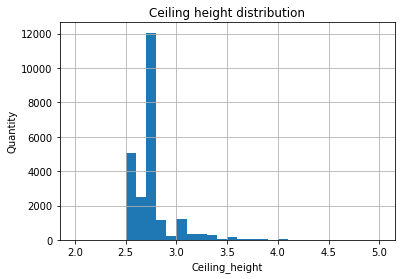

In [19]:
df['ceiling_height'].plot(x = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5), grid=True);
plt.title("Ceiling height distribution")
plt.xlabel("Ceiling_height")
plt.ylabel("Quantity")
plt.show()

#### floors_total -всего этажей в доме

In [20]:
#проверим уникальные значения
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

In [21]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.7,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.7,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.7,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Закономерности какой-то нет, всего 0,3% пропущено, поэтому удалим данные строки

In [22]:
df=df.dropna(subset=['floors_total'])


In [23]:
df['floors_total'] = df['floors_total'].astype('int')

In [24]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Максимальная этажность дома 60, скорее всего выбросы, но таких значений немного, оставим как есть.

#### is_apartment - апартаменты (булев тип)

In [25]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Скорее всего владельцы недвижимости не знали, что такое апартаменты и не заполняли эти данные. С другой стороны владельцы апартаментов точно знают, что у них апартаменты, и можно предположить, что именно они ответили утвердительно.
Все пропущенные значения заменим на False.

In [26]:
#заполним пропущенные значения 
df['is_apartment'] = df['is_apartment'].fillna(False)

#### balcony - число балконов

Скорее всего владельцы недвижимости не указали число балконов, потому что у них их нет. Заменим все пропущенные значения на 0.
И переведем все значения в целочисленные

In [27]:
df['balcony'].value_counts()

1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [28]:
#заменяем пропущенные значения
df['balcony'] = df['balcony'].fillna(0)

In [29]:
#переводим все значения в целочисленные
df['balcony'] = df['balcony'].astype('int')

#### days_exposition - сколько дней было размещено объявление (от публикации до снятия)
Возможно пропуски связаны с тем, что неизвестно когда было закрыто объявление или его не сняли, после продажи квартиры. Оставляем как есть, изменения могут привести к искажению данных. 

In [30]:
print('Количество NaN по days_exposition:', df['days_exposition'].isnull().sum())


Количество NaN по days_exposition: 3172


In [31]:
df['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      201
         ... 
969.0       1
1147.0      1
1.0         1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64

#### Пропуски картографические(парки и водоемы)

К ним относятся: 

ponds_nearest — расстояние до ближайшего водоёма (м)

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

parks_around3000 — число парков в радиусе 3 км

Скорее всего данные первоначально не было выгружены, заполнить данные средним/медианой невозможно, так как это может исказить статистику. Эти данные не самые важные в нашей выгрузке и есть достаточно информации, уже заполненной, чтобы посмотреть какие-нибудь закономерности. Заполнять не будем.


In [32]:
print('Доля NaN по parks_nearest:', df['parks_nearest'].isnull().mean())
print('Доля NaN по ponds_nearest:', df['ponds_nearest'].isnull().mean())


Доля NaN по parks_nearest: 0.6592978444077415
Доля NaN по ponds_nearest: 0.6162706983441325


In [33]:
df['parks_nearest'].value_counts()
df['ponds_nearest'].value_counts()
df['ponds_around3000'].value_counts()
df['parks_around3000'].value_counts()

0.0    10064
1.0     5657
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

#### Пропуски картографические(расстояние до центра и аэропорта в м)
airports_nearest— расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest — расстояние до центра города (м)

Также заполняется системой.Вручную изменить и заполнить данные не можем, так как,возможно,приведет к искажению


In [34]:
print('Доля NaN по airports_nearest:', df['airports_nearest'].isnull().mean())
print('Количество NaN по airports_nearest:', df['airports_nearest'].isnull().sum())
print('Доля NaN по cityCenters_nearest:', df['cityCenters_nearest'].isnull().mean())
print('Количество NaN по cityCenters_nearest:', df['cityCenters_nearest'].isnull().sum())

Доля NaN по airports_nearest: 0.2342777283699657
Количество NaN по airports_nearest: 5532
Доля NaN по cityCenters_nearest: 0.23330368864608478
Количество NaN по cityCenters_nearest: 5509


Посмотрим где у нас пропуски в  airports_nearest и  cityCenters_nearest

In [35]:
df_cities_NaN_airport = df[((df['cityCenters_nearest'].isnull()) | (df['airports_nearest'].isnull()))]
df_cities_NaN_airport

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.70,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.70,9,NaN,2,False,False,False,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5,45.50,3,False,False,False,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.70,5,17.50,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.70,5,38.00,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3,29.70,1,False,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим, в каждой ли строке, где NaN в airports_nearest, есть NaN в cityCenters_nearest

In [36]:
print('Попарных пропусков',df_cities_NaN_airport.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest').shape[0])

Попарных пропусков 5508


Получается сбой идет систематический.

Посмотрим сводную, какое соотношение этих данных по населенным пунктам

In [37]:
df_cities_NaN_airport.value_counts('locality_name').head(20)

locality_name
посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Сосновый Бор                87
Санкт-Петербург             84
Кировск                     84
Отрадное                    80
посёлок Бугры               68
dtype: int64

Видим что картографические данные не заполнены в отдаленных пунктах в основном,присутствует и Санкт-Петербург, он на 17 месте.
Наверно какой то сбой или удаленные районы не считываются системой корректно. 
Заполнить пропуски нет возможности, поэтому оставляем как есть

#### Площади (кухня и жилая)
 * kitchen_area-площадь кухни в квадратных метрах (м²)





In [38]:
df['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
7.78        1
7.12        1
13.73       1
14.74       1
16.74       1
Name: kitchen_area, Length: 966, dtype: int64

In [39]:
df['kitchen_area'].describe()

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

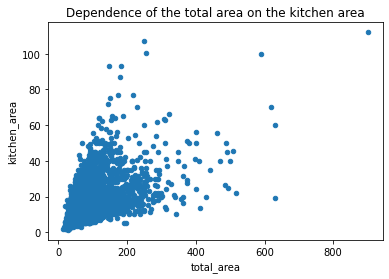

In [40]:
df.plot(y='kitchen_area',x='total_area', kind='scatter')
plt.title("Dependence of the total area on the kitchen area")
plt.show()

Наблюдается линейная зависимость, чем больше общая площадь, тем больше кухня. Соответственно заменим пропуски медианным значением в зависимости от количества комнат rooms

In [41]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [42]:
#поставим 0  в те значения, где количество комнат равно 0, соответственно и отдельно площади комнат не будет
df.loc[(df['kitchen_area'].isna()) & (df['rooms']== 0), 'kitchen_area'] = 0

In [43]:
#заменим средним значением пропуски, в зависимости от количества комнат
for it in df['rooms'].unique():
    df.loc[(df['kitchen_area'].isna()) & (df['rooms']== it), 'kitchen_area'] = df.loc[(df['rooms']== it), 'kitchen_area'].median()


* living_area — жилая площадь в квадратных метрах (м²)

In [44]:
df['living_area'].value_counts()


18.00    882
17.00    674
30.00    598
16.00    484
20.00    481
        ... 
50.26      1
43.81      1
54.43      1
86.10      1
16.74      1
Name: living_area, Length: 1769, dtype: int64

In [45]:
df['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Среднее от медианы не сильно отличается, но стандартное отклонение 22, посмотрим есть ли зависимость между общей площадью и жилой

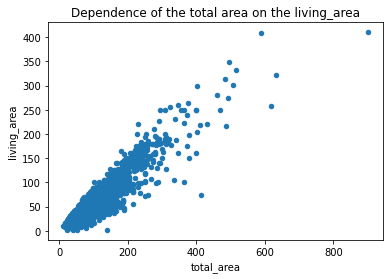

In [46]:
df.plot(y='living_area',x='total_area', kind='scatter')
plt.title("Dependence of the total area on the living_area")
plt.show()

Как ожидалось, у нас линейная зависимость, чем больше общая площадь, тем больше жилая. Соответственно заменим пропуски медианным значением в зависимости от количества комнат rooms

In [47]:
for it in df['rooms'].unique():
    df.loc[(df['living_area'].isna()) & (df['rooms']== it), 'living_area'] = df.loc[(df['rooms']== it), 'living_area'].median()

####  locality_name - название населённого пункта. 

Проверим на неявные дубликаты и при необходимости скорректируем данные.
Пока пропущенные значения заменим на 'unknown'

In [48]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [49]:
sorted(df['locality_name'].unique())

['unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское

In [50]:
df['locality_name'] = df['locality_name'].str.lower() 

In [51]:
df['locality_name'].value_counts()

санкт-петербург                               15651
посёлок мурино                                  520
посёлок шушары                                  439
всеволожск                                      398
пушкин                                          369
                                              ...  
деревня куровицы                                  1
деревня старое хинколово                          1
посёлок при железнодорожной станции вещево        1
деревня борисова грива                            1
деревня ялгино                                    1
Name: locality_name, Length: 365, dtype: int64

In [52]:
#убираем дубликаты неявные, чтобы не было большого разброса данных, как например:
#«поселок Рябово» и «поселок городского типа Рябово»,
df['locality_name'] = df['locality_name'].replace('посёлок|деревня|село|поселок|городского|типа', '', regex=True)
df['locality_name'] = df['locality_name'].replace('  ', '', regex=True)
df['locality_name'].value_counts()

санкт-петербург                        15651
 мурино                                  552
 шушары                                  439
всеволожск                               398
пушкин                                   369
                                       ...  
 сижно                                     1
 при железнодорожной станции вещево        1
 тёсово-4                                  1
 володарское                               1
 малая романовка                           1
Name: locality_name, Length: 324, dtype: int64

Так как мы не нашли связи с пропусками картографическими, посмотрим есть ли у нас пропущенные населенные пункты с известными расстояниями. Ранее мы заменили пропуски на unknown

In [53]:
print('Количество unknown по locality_name:', df.loc[df['locality_name']=='unknown']['locality_name'].count())
df.loc[df['locality_name']=='unknown'][['locality_name', 'cityCenters_nearest']].head()

Количество unknown по locality_name: 48


,locality_name,cityCenters_nearest
1097,unknown,4258.0
2033,unknown,NaN
2603,unknown,17369.0
2632,unknown,17369.0
3574,unknown,8127.0


Получается у нас есть расстояние до центра там, где отсутствует населенный пункт, можно тогда заполнить пропуски
Нужно определить координаты санкт-петербурга

In [54]:
df[df['locality_name'] == 'санкт-петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest']].value_counts().head(15)

locality_name    cityCenters_nearest  airports_nearest
санкт-петербург  8460.0               37434.0             61
                 10720.0              39946.0             30
                 20802.0              44870.0             28
                 20444.0              18732.0             27
                 8434.0               37407.0             27
                 10364.0              39140.0             26
                 4836.0               31744.0             25
                 8370.0               37412.0             24
                 4844.0               19499.0             22
                 17121.0              21793.0             21
                 10337.0              30073.0             21
                 13056.0              51333.0             21
                 16921.0              44382.0             21
                 5294.0               23604.0             19
                 16788.0              21460.0             19
dtype: int64

In [55]:
df[df['locality_name'] != 'санкт-петербург'][['locality_name', 'cityCenters_nearest', 'airports_nearest']].head(20)

,locality_name,cityCenters_nearest,airports_nearest
1,шушары,18603.0,12817.0
5,городскойянино-1,NaN,NaN
6,парголово,19143.0,52996.0
8,мурино,NaN,NaN
11,ломоносов,51677.0,48252.0
12,сертолово,NaN,NaN
13,петергоф,33058.0,37868.0
14,пушкин,30759.0,20782.0
20,парголово,19311.0,53134.0
22,кудрово,NaN,NaN


Получается у нас есть населенные пункты Санкт-Петербург с расстоянием от центра в 20 км, и населенные пункты с меньшим расстоянием. Тогда примем в расчет, что с расстоянием от центра до 10км это у нас Санкт-Петербург и заменим эти значения

In [56]:
df.loc[(df['locality_name'] == 'unknown') & (df['cityCenters_nearest'] < 10000), 'locality_name'] = df.loc[(df['locality_name'] == 'unknown') & (df['cityCenters_nearest'] < 10000), 'locality_name'].replace('unknown','санкт-петербург')


Посмотрим что получилось

In [57]:
print('Количество unknown по locality_name:', df.loc[df['locality_name']=='unknown']['locality_name'].count())

Количество unknown по locality_name: 23


у нас заполнилось 25 значений, осталось 23 пропуска, что уже хороший результат

#### first_day_exposition -дата публикации

Тип object - должен быть тип datetime

In [58]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

### Изменим типы данных


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

Мы уже изменили данные в целых значениях:
* floors_total
* balcony

Перевели дату first_day_exposition в datetime64 

Теперь скорректируем данных в остальных столбцах:
* last_price - приведем в целочисленные, нас не интересуют тысячные, так как все суммы в миллионах
* total_area, living_area,kitchen_area - округлим до одного знака после запятой, так как общая площадь до десятых значима
* ceiling_height - округлим до одного знака после запятой, так как стандартное значение высоты потолков измеряется до десятых
* картографические данных указаны в метрах и количество таких значений - у нас остались пропущенные значения, оставляем float. округлим до 1 знака
(airports_nearest , cityCenters_nearest , parks_around3000, parks_nearest, ponds_around3000, ponds_nearest)
* days_exposition сколько дней продавалось, это количество, округлим до 1 знака, так как есть пропущенные

In [60]:
#переведем в целочисленный тип наши данные
translation_to_int = ['last_price', 'airports_nearest']
for i in translation_to_int:
    df[i] = df[df[i].notnull()][i].astype('int')

In [61]:
#округлим до одного знака после запятой
translation_to_float = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area','airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in translation_to_float:
    df[i] = df[df[i].notnull()][i].round(1)

In [62]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.7,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод:** 
Провели первичную предобработку данных. Исходные данные имеют много выбросов, пропусков и некорректных значений.
В результате обработки произвели следующие изменения:
* first_day_exposition - object - заменили на тип datetime
* ceiling_height - заменили пропущенные значения медианой, выбросы поменяли на корректное отображение в метрах, также все потолки меньше 2.5 м также заменили медианой
* floors_total - т.к. количество этажей - целое значение, заменили на целочисленный тип int. Пропущенных значений было немного 0,3% от всех данных, данные были удалены для чистоты исследования
* is_apartment - было заполнено только 12% данных, исходя из предположения, что не заполняли эти данные те, кто не является владельцем апартаментов, все значения были заменены на False
* living_area и kitchen_area - пропущенные значения были заменены на медианные значения в зависимости от количества комнат, так как мы подтвердили зависимость: с ростом общей площади происходит рост жилой части и кухни
* balcony - т.к. количество балконов - целое значение, заменили на целочисленный тип int. Пропущенные значения заменили 0, т.к. пропуски в данных, скорее всего, связаны с отсутствием балконов у владельцев.
* locality_name - исправили неявные дубликаты, пропущенные значения заменили на unknown, так как нет возможности узнать корректные данные
* картографические данные оставили без изменений, так как они заполняются автоматически, скорее всего, произошла потеря данных. Взять данные мы не можем, поэтому работает с исходными.

Изменили тип данных в зависимости от наших значений, для корректности дальнейших исследований и построения графиков


## Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра
Создадим новый столбец: price_one_square_meter (цена 1 квадратного метра). Для этого поделим цену на момент снятия на общую площадь квартиры


In [63]:
df['price_one_square_meter'] = df['last_price'] / df['total_area']

In [64]:
#посмотрим, что получилось
df['price_one_square_meter'].head()

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_one_square_meter, dtype: float64

In [65]:
#Приведем для удобства в целочисленные значения
df['price_one_square_meter'] = df['price_one_square_meter'].astype('int')

### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [66]:
#создадим столбец день недели
df['weekday'] = df['first_day_exposition'].dt.weekday

In [67]:
#смотрим результат
df['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

### Месяц публикации объявления


In [68]:
#создадим столбец месяц публикации
df['month'] = df['first_day_exposition'].dt.month

In [69]:
#смотрим результат
df['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

### Год публикации объявления

In [70]:
#создадим столбец год публикации
df['year'] = df['first_day_exposition'].dt.year

In [71]:
#смотрим результат
df['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

### Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [72]:
#создадим функцию для категоризации значений, в зависимости от этажности
#floor — этаж и # floors_total — всего этажей в доме
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'


In [73]:
#создадим новый столбец с категорией этажа
df['categorize_floor'] = df.apply(categorize_floor, axis = 1)

In [74]:
#проверим,что все работает корректно
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,categorize_floor
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.7,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой


### Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)


In [75]:
#переведем в км
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round()

In [76]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,categorize_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,False,False,False,11.0,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.7,14,45.0,9,False,False,False,9.5,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8.0


In [77]:
df['cityCenters_nearest_km'].describe()

count    18104.000000
mean        14.178745
std          8.621887
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

У нас максимальное значение 66 км, заполним пропуски несуществующим числом 999, чтобы далее его можно было исключить, для задания 5

In [78]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999)

In [79]:
df['cityCenters_nearest_km'].isna().sum()

0

**Вывод:** 
Для дальнейшего анализа были добавлены новые столбцы:
* price_one_square_meter (цена 1 квадратного метра)
* weekday (день недели) - принимает значения 0 - понедельник, 1 - вторник и т.д.
* month, year - месяц и год публикации
* categorize_floor -тип этажа квартиры (значения — «первый», «последний», «другой»)
* cityCenters_nearest_km - расстояние в км до центра города



## Проведите исследовательский анализ данных

### Изучение и описание параметров таблицы

#### Общая площадь - total_area

Не было пропусков, посмотрим,есть ли здесь аномальные значения

In [80]:
df['total_area'].describe()

count    23613.000000
mean        60.340668
std         35.649000
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

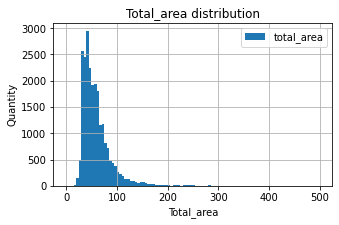

In [81]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
plt.title("Total_area distribution")
plt.xlabel("Total_area")
plt.ylabel("Quantity")
plt.show()


Общая площадь имеет разброс данных от  12 м2. до 900 м2. среднее значение 60 м2, а медиана 52 м2.
Посмотрим выбросы и уберем их

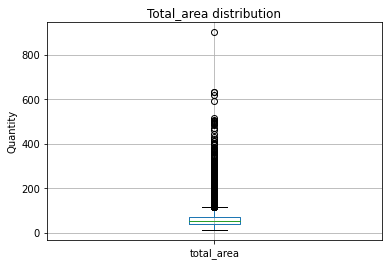

In [82]:
df.boxplot('total_area',grid=True)
plt.title("Total_area distribution")
plt.ylabel("Quantity")
plt.show()

Определяем границы:

total_area - 20-120 м2

Уберем аномальные значения и снова построим график

In [83]:
df_filter = df.query('20 <= total_area <= 120')


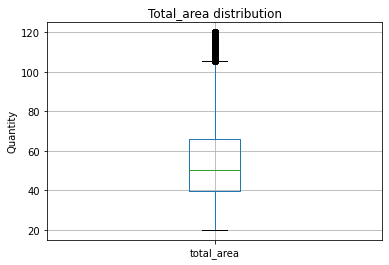

In [84]:
df_filter.boxplot('total_area',grid=True)
plt.title("Total_area distribution")
plt.ylabel("Quantity")
plt.show()

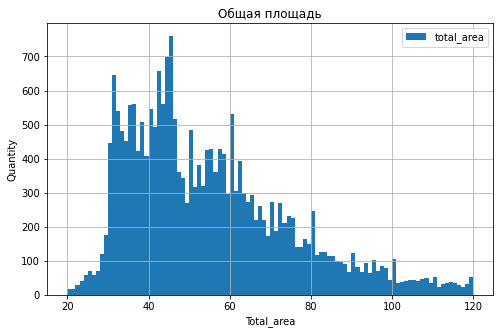

In [85]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (8,5), range = (20,120), title = 'Общая площадь')
plt.xlabel("Total_area")
plt.ylabel("Quantity")
plt.show()

Проверим сколько данных осталось

In [86]:
df_filter['total_area'].describe()

count    22528.000000
mean        54.898140
std         20.045639
min         20.000000
25%         39.700000
50%         50.500000
75%         66.000000
max        120.000000
Name: total_area, dtype: float64

Мы отбросили 4,5%  от изначальных данных. Изменения не критичны,оставляем результат

#### Жилая площадь - living_area
Мы уже заменили пропущенные значения на медианные, в зависимости от количества комнат, так как мы подтвердили зависимость: с ростом общей площади происходит рост жилой части и кухни.

Уберем аномалии и построим гистограмму.

In [87]:
df['living_area'].describe()

count    23613.000000
mean        34.331800
std         21.712717
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

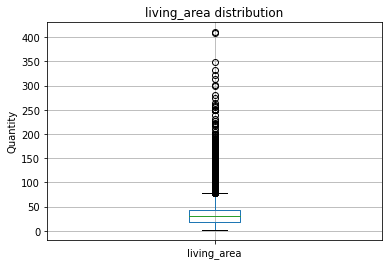

In [88]:
df.boxplot('living_area',grid=True)
plt.title("living_area distribution")
plt.ylabel("Quantity")
plt.show()

Определяем границы:

living_area - 2-75 м2
Уберем аномальные значения и снова построим график

In [89]:
df_filter = df_filter.query('2 <= living_area <= 75')

In [90]:
df_filter['living_area'].describe()

count    22384.000000
mean        30.998030
std         13.239383
min          2.000000
25%         18.000000
50%         30.000000
75%         40.200000
max         75.000000
Name: living_area, dtype: float64

Мы отбросили 5,2%  от изначальных данных. Изменения не критичны,оставляем результат

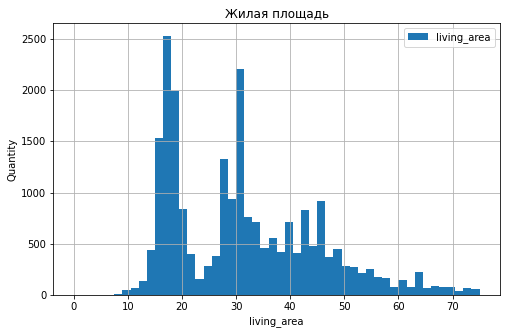

In [91]:
df.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (8,5), range = (0,75), title = 'Жилая площадь')
plt.ylabel("Quantity")
plt.xlabel("living_area")
plt.show()

#### Площадь кухни - kitchen_area
Мы уже заменили пропущенные значения на медианные, в зависимости от количества комнат, так как мы подтвердили зависимость: с ростом общей площади происходит рост жилой части и кухни.

Уберем аномалии и построим гистограмму.

In [92]:
df['kitchen_area'].describe()

count    23613.000000
mean        10.370931
std          5.723983
min          0.000000
25%          7.200000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

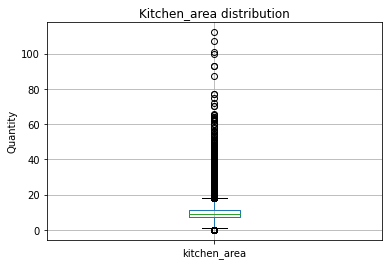

In [93]:
df.boxplot('kitchen_area',grid=True)
plt.title("Kitchen_area distribution")
plt.ylabel("Quantity")
plt.show()

Определяем границы:

kitchen_area - 4-17 м2
Уберем аномальные значения и снова построим график

In [94]:
df_filter = df_filter.query('0 <= kitchen_area <= 30')

Посмотрим сколько отсеялось после пересмотра границ

In [95]:
df_filter['kitchen_area'].describe()

count    22245.000000
mean         9.630398
std          3.757984
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         30.000000
Name: kitchen_area, dtype: float64

Мы отбросили 5,7%  от изначальных данных. Изменения не критичны,оставляем результат

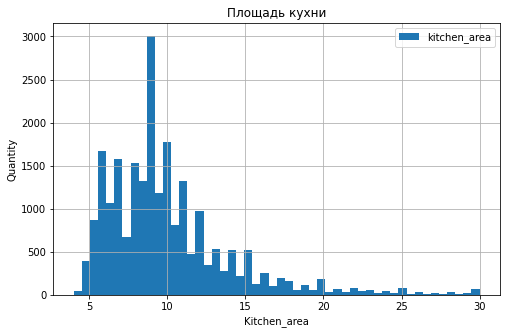

In [96]:
df.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (8,5), range = (4,30), title = 'Площадь кухни')
plt.xlabel("Kitchen_area")
plt.ylabel("Quantity")
plt.show()

#### Цена объекта - last_price

In [97]:
df['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

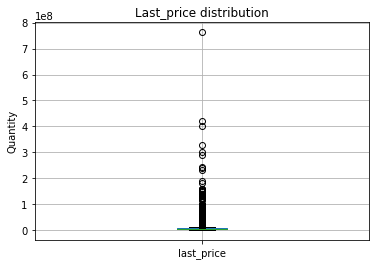

In [98]:
df.boxplot('last_price',grid=True)
plt.title("Last_price distribution")
plt.ylabel("Quantity")
plt.show()

Определяем границы:

last_price - 0-12 млн.руб
Уберем аномальные значения и снова построим график

In [99]:
df_filter = df_filter.query('0 <= last_price <= 12000000')

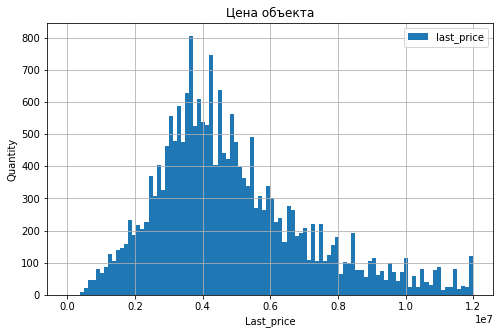

In [100]:
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,12000000), figsize = (8,5), title = 'Цена объекта')
plt.xlabel("Last_price")
plt.ylabel("Quantity")
plt.show()

Посмотрим сколько данных осталось

In [101]:
df_filter['last_price'].describe()

count    2.139100e+04
mean     4.828026e+06
std      2.217900e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      5.987500e+06
max      1.200000e+07
Name: last_price, dtype: float64

Мы отбросили 9,4%  от изначальных данных. Изменения не критичны,оставляем результат

#### Количество комнат - rooms

Не было пропусков, посмотрим, есть ли аномальные значения

In [102]:
df['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

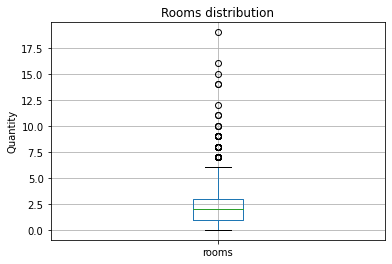

In [103]:
df.boxplot('rooms',grid=True)
plt.title("Rooms distribution")
plt.ylabel("Quantity")
plt.show()

Определяем границы:

rooms - 0-6 комнат

Уберем аномальные значения и снова построим график

In [104]:
df_filter = df_filter.query('0 <= rooms <= 6')

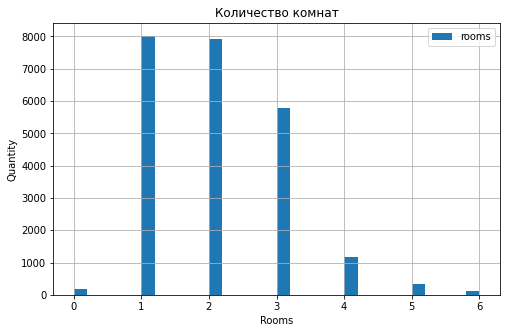

In [105]:
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, range = (0,6), figsize = (8,5), title = 'Количество комнат')
plt.ylabel("Quantity")
plt.xlabel("Rooms")
plt.show()

Посмотрим сколько данных осталось

In [106]:
df_filter['rooms'].describe()

count    21391.000000
mean         1.915104
std          0.886495
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

Мы отбросили 9,4%  от изначальных данных. Изменения не критичны,оставляем результат

#### Высота потолков - ceiling_height
Мы уже изменили пропущенные значения на медиану и заменили медианой потолки меньше 2.5 м

In [107]:
df['ceiling_height'].describe()

count    23613.000000
mean         2.721243
std          0.233551
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

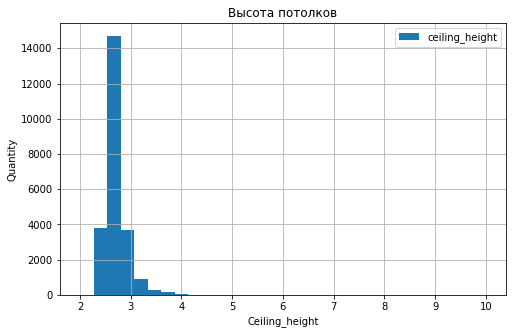

In [108]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, range = (2,10), figsize = (8,5), title = 'Высота потолков')
plt.xlabel("Ceiling_height")
plt.ylabel("Quantity")
plt.show()

#### Тип этажа квартиры («первый», «последний», «другой») - categorize_floor

Сгруппируем данные и построим круговую диаграмму

In [109]:
group = df.groupby('categorize_floor')['floor'].agg(['count'])
group

,count
categorize_floor,
другой,17363
первый,2914
последний,3336


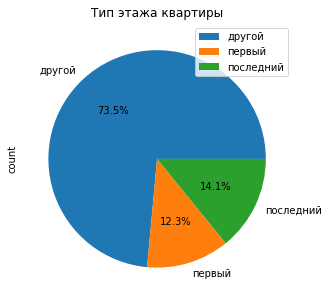

In [110]:
group.plot(y = 'count', kind = 'pie', figsize = (8,5), title = 'Тип этажа квартиры', autopct='%1.1f%%', );

#### Общее количество этажей в доме - floors_total
Ранее мы удалили пропущенные значения -86 Nan, всего 0,3% данных, что не влияет на общую картину, заполнить пропущенные данные нет возможности

In [111]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

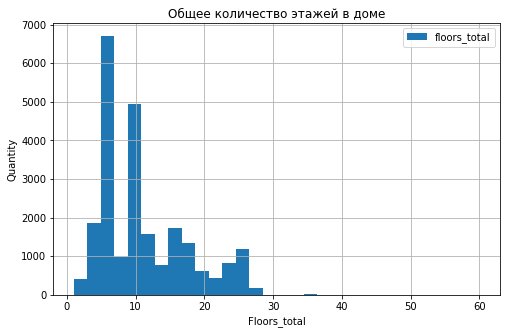

In [112]:
df.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, range = (1,60), figsize = (8,5), title = 'Общее количество этажей в доме')
plt.xlabel("Floors_total")
plt.ylabel("Quantity")
plt.show()

#### Расстояние до центра города в метрах - cityCenters_nearest 

Так как это картографические данные, которые заполнялись системой, мы предположили, что заменить средним/медианой будет некорректно, поэтому все пропуски остались без изменений

In [113]:
df['cityCenters_nearest'].describe()

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [114]:
print('Пропущенных значений', df['cityCenters_nearest'].isna().sum())

Пропущенных значений 5509


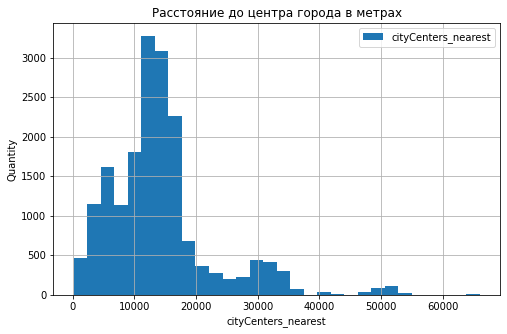

In [115]:
df.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, range = (180,66000), figsize = (8,5), title = 'Расстояние до центра города в метрах')
plt.ylabel("Quantity")
plt.xlabel("cityCenters_nearest")
plt.show()

Среднее и медиана не сильно отличаются, 14185м и 13093м соответственно, большая часть квартир находится в диапазоне 9000-16000 м.

#### Расстояние до ближайшего аэропорта в метрах - airports_nearest

Так как это картографические данные, которые заполнялись системой, мы предположили, что заменить средним/медианой будет некорректно, поэтому все пропуски остались без изменений

In [116]:
df['airports_nearest'].describe()

count    18081.000000
mean     28788.008185
std      12626.209956
min          0.000000
25%      18575.000000
50%      26726.000000
75%      37242.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [117]:
print('Пропущенных значений', df['airports_nearest'].isna().sum())

Пропущенных значений 5532


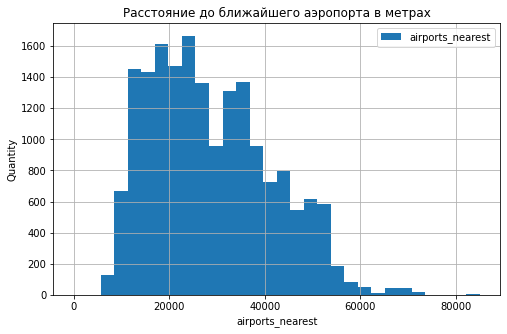

In [118]:
df.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, range = (0,85000), figsize = (8,5), title = 'Расстояние до ближайшего аэропорта в метрах')
plt.ylabel("Quantity")
plt.xlabel("airports_nearest")
plt.show()

Среднее и медиана не сильно отличаются, 28788м и 26726м соответственно, большая часть квартир находится в диапазоне 18000-37000 м.

#### Расстояние до ближайшего парка в метрах - parks_nearest
Так как это картографические данные, которые заполнялись системой, мы предположили, что заменить средним/медианой будет некорректно, поэтому все пропуски остались без изменений


In [119]:
df['parks_nearest'].describe()

count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [120]:
print('Пропущенных значений', df['parks_nearest'].isna().sum())

Пропущенных значений 15568


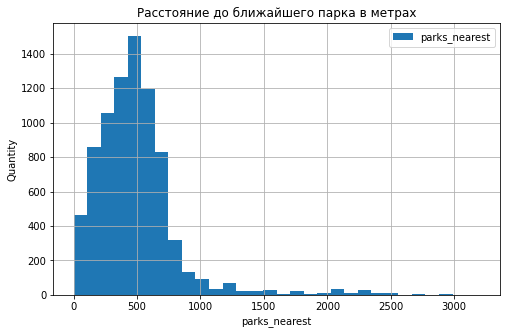

In [121]:
df.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, range = (1,3200), figsize = (8,5), title = 'Расстояние до ближайшего парка в метрах')
plt.ylabel("Quantity")
plt.xlabel("parks_nearest")
plt.show()

Среднее и медиана не сильно отличаются, 490м и 450м соответственно, большая часть квартир находится в диапазоне 180-700 м.

#### День и месяц публикации объявления - weekday, month
Данные мы посчитали по столбцу first_day_exposition-дата публикации.
Посмотрим есть ли какая-то зависимость в даных.

##### weekday
Данные по дням недели указаны след.образом: 0 - понедельник, 1 - вторник и т.д

In [122]:
group_weekday = df.groupby('weekday')['weekday'].agg(['count'])
group_weekday

,count
weekday,
0,3602
1,4170
2,3956
3,4285
4,3988
5,1922
6,1690


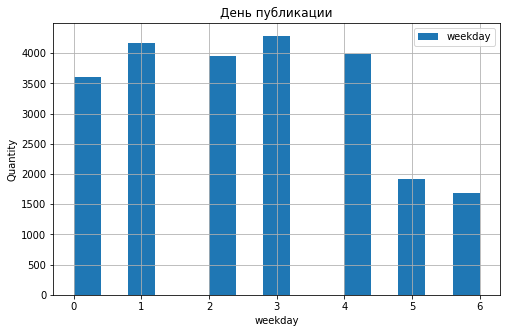

In [123]:
df.plot(y = 'weekday', kind = 'hist', bins = 15, grid=True, range = (0,6), figsize = (8,5), title = 'День публикации')
plt.ylabel("Quantity")
plt.xlabel("weekday")
plt.show()

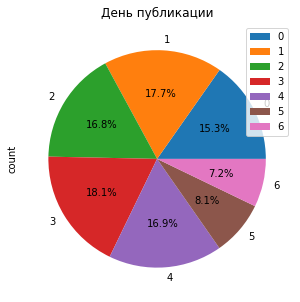

In [124]:
group_weekday.plot(y = 'count', kind = 'pie', figsize = (8,5), title = 'День публикации', autopct='%1.1f%%', );

По нашей выборке чаще всего выставляют объявление  в четверг 18.1% и вторник 17.7%, чуть меньше в остальные будни(понедельник-15.3%, среда-16.8%, пятница-19.9%). На выходных почти в два раза меньше (суббота-8.1%, воскресенье-7.2%)

#####  month
Данные по месяцам указаны след.образом: 1-январь,2-февраль и т.д.

In [125]:
group_month = df.groupby('month')['month'].agg(['count'])
group_month

,count
month,
1,1496
2,2637
3,2580
4,2362
5,1265
6,1752
7,1690
8,1741
9,1974


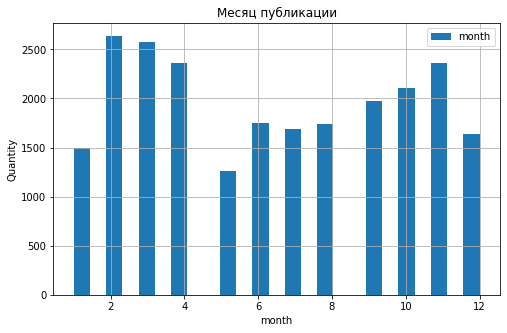

In [126]:
df.plot(y = 'month', kind = 'hist', bins = 25, grid=True, range = (1,12), figsize = (8,5), title = 'Месяц публикации')
plt.ylabel("Quantity")
plt.xlabel("month")
plt.show()

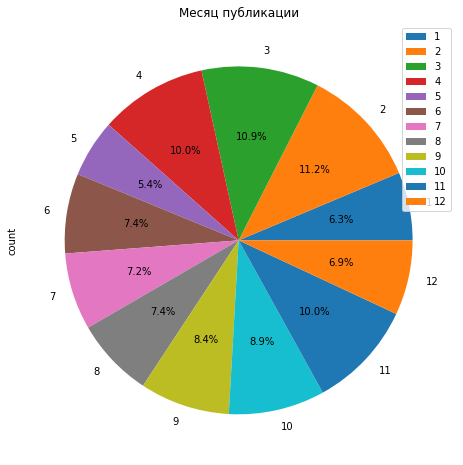

In [127]:
group_month.plot(y = 'count', kind = 'pie', figsize = (8,8), title = 'Месяц публикации', autopct='%1.1f%%');

По нашей выборке чаще всего выставляют объявление: февраль 11,2%, март- 10,9%,апрель-10,0% и ноябрь-10,0%, меньше всего объявлений в мае-5.4%.

Итоговая проверка, сколько данных осталось в выборке

In [128]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21391 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21391 non-null  int64         
 1   last_price              21391 non-null  int64         
 2   total_area              21391 non-null  float64       
 3   first_day_exposition    21391 non-null  datetime64[ns]
 4   rooms                   21391 non-null  int64         
 5   ceiling_height          21391 non-null  float64       
 6   floors_total            21391 non-null  int64         
 7   living_area             21391 non-null  float64       
 8   floor                   21391 non-null  int64         
 9   is_apartment            21391 non-null  bool          
 10  studio                  21391 non-null  bool          
 11  open_plan               21391 non-null  bool          
 12  kitchen_area            21391 non-null  float6

Изначально было 23699, с учетом всех изменений осталось 21391. Также остались пропуски в картографических данных, которые мы решили не трогать. 
Наша выборка уменьшилась на 9.7%, это меньше 10% от всей выборке.

**Вывод:** 
1. Гистограмма "Общая площадь": 

Общая площадь имеет разброс данных от 12 м2. до 900 м2. среднее значение 60 м2, а медиана 52 м2
Большая часть квартир имеет метраж от 30 до 80 м2.

2. Гистограмма "Жилая площадь": 

Жилая площадь имеет разброс данных от 2 м2. до 145 м2. среднее значение 31 м2, а медиана 30 м2
Наблюдается 2 пика с наиболее часто встречающимися значениями 18 и 30 м2. 

3. Гистограмма "Площадь кухни": 

Площадь кухни имеет разброс данных от 4 м2. до 64 м2. среднее значение и медиана 9 м2.
Самое часто встречающееся значение 9 м2.

4. Гистограмма - "Цена объекта"

Стоимость сильно разбросана, есть варианты за 12 тыс.руб. и за 763 млн.руб. 
Большая часть цен на объекты находятся в диапазоне от 3 до 12 млн.
Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.

5. Гистограмма - "Количество комнат"

Количество комнат в диапазоне от 1 до 19. Больше всего однокомнатных квартир и двухкомнатных квартир. Медиана и среднее 2.
Чуть меньше трехкомнатных, остальных комнат на порядок ниже

6. Гистограмма - "Высота потолков"

Первоначально высота потолков была в диапазоне от 1 до 100, мы заменили потолки ниже 2.5м и выше 10м медианным значением, так как,скорее всего, наблюдается ошибка в данных. Привели к стандартному значению потолков в России.
Медиана и среднее у нас 2.7м. Чаще всего встречаются потолки от 2.5-2.7 до 3м. Остальные случаи редкие.

7. Гистограмма - "Тип этажа квартиры"

Из всей выборки данных квартиры распределены следующим образом: первый этаж 12.3%, последний 14.1%, и другие 73.5%

8. Гистограмма - "Общее количество этажей в доме"

Общее количество этажей в доме находятся в диапазоне от 1-60эт. Среднее 10эт, медиана 9эт. Чаще всего встречаются 5эт дома.

9. Гистограмма - "Расстояние до центра города в метрах"

Мы не заменяли пропущенные значения в картографических данных. Разброс от 181м-65968м.
Среднее и медиана не сильно отличаются, 14185м и 13093м соответственно, большая часть квартир находится в диапазоне 9000-16000 м.

10. Гистограмма - "Расстояние до ближайшего аэропорта в метрах"

Мы не заменяли пропущенные значения в картографических данных. Разброс от 0м-84869м.
Среднее и медиана не сильно отличаются, 28788м и 26726м соответственно, большая часть квартир находится в диапазоне 18000-37000 м.

11. Гистограмма - "Расстояние до ближайшего парка в метрах"

Мы не заменяли пропущенные значения в картографических данных. Разброс от 1м-390м.
Среднее и медиана не сильно отличаются, 490м и 450м соответственно, большая часть квартир находится в диапазоне 180-700 м.

12. Гистограмма - "День и месяц публикации объявления - weekday, month"

Данные по дням недели указаны след.образом: 0 - понедельник, 1 - вторник и т.д Видно, что в будни люди чаще выставляют объявления, а на выходных почти в два раза меньше.

Данные по месяцам указаны след.образом: 1-январь,2-февраль и т.д.
Наблюдается динамика, что активно выкладывать обявления начинают после новогодних праздников(декабрь,январь), пик приходится на февраль месяц-11.2%, дальше самый большой спад в мае-5.4%(можно предположить, что все настроены на майские праздники и приближающееся лето),дальше наблюдается рост до ноября.

*Итог:*
Почти во всех данных есть сильные выбросы, такие как: высота потолков в 1 или 100 метров, цена квартиры в 12190 рублей. О корректности данных необходимо уточнить у сотрудников, которые формировали их. Для дальнейшего изучения данных, мы не станем убирать эти выбивающиеся значения.

### Задача 2. Изучите, как быстро продавались квартиры - days_exposition

Посмотрим столбец days_exposition. Этот параметр показывает, сколько дней «висело» каждое объявление.
Мы не заменяли пропущенные значения, так как восстановление их медианным значением, может привести к искажению данных. 
Возможно пропуски связаны с тем, что объявления забыли снять, после продажи квартиры.

In [129]:
df['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [130]:
print('Пропущенных значений', df['days_exposition'].isna().sum())

Пропущенных значений 3172


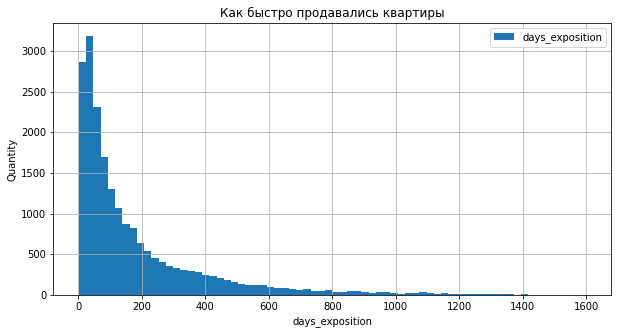

In [131]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 70, grid=True, range = (1,1600), figsize = (10,5), title = 'Как быстро продавались квартиры')
plt.xlabel("days_exposition")
plt.ylabel("Quantity")
plt.show()

У нас большой разброс данных, есть квартиры которые продавались 1 день и 1580д(4г4мес), наверно эти объявления тоже забыли снять с продажи.

Медиана у нас 95(3мес), а среднее 180д(6мес)
На диграмме видно, что большая часть квартир продавалась в теч. 50 дней, есть и те которые продавались до года, чем дальше, тем меньше объвлений.

Построим еще диаграмму, чтобы отбросить выбросы.

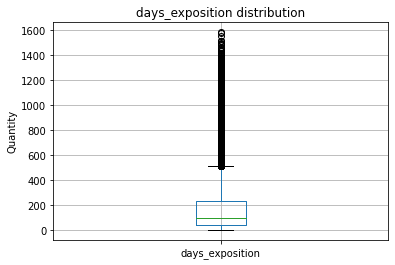

In [132]:
df.boxplot('days_exposition',grid=True)
plt.title("days_exposition distribution")
plt.ylabel("Quantity")
plt.show()

Определяем границы:

days_exposition - 0-500 дней

Уберем аномальные значения и снова построим график

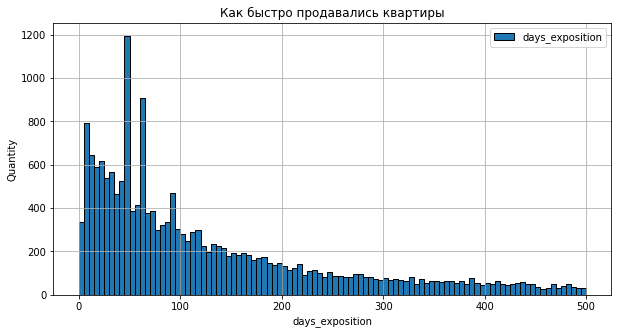

In [133]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,500), figsize = (10,5), title = 'Как быстро продавались квартиры',ec='black')
plt.xlabel("days_exposition")
plt.ylabel("Quantity")
plt.show()


Видим выбросы, посмотрим внимательнее какие значения они принимают, пока видно, что у нас есть три выброса в диапазоне от 0-100

Проверим конкретнее.

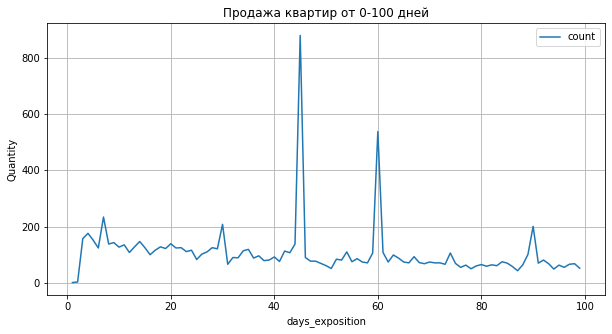

In [134]:
group_day = df.query('0< days_exposition < 100').groupby('days_exposition')['days_exposition'].agg(['count']).plot(grid=True, figsize=(10,5),title = 'Продажа квартир от 0-100 дней')
plt.xlabel("days_exposition")
plt.ylabel("Quantity")
plt.show()


Получается у нас пик снятия объявления с продажи приходится на дни: 45,60,90
Возможно это как то связано с системой размещения объвлений, например, прозвон с уточнением актуальности объявления или автоматически,как в авито оно закрывается. 

Если считать с аномалиями, то попробуем ответить на вопрос: 
Какие продажи можно считать быстрыми, а какие — необычно долгими?

Быстрыми можно считать продажи, которые продаются в моменте, минимальное значение нашей выборки от 1 - 45 дней.
Необычно долгими,исходя из таблица с усами, считаем объявления, которые висят дольше 500 дней.

По поводу выбросов, нужно уточнить у ответственных лиц. Убирать нам эти значения или нет.

Предположим, что это системные выбросы и их не нужно учитывать, изменятся ли наши выводы.

Уберем 45,60,90 дни.

In [135]:
df_filter_day = df.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

In [136]:
df_filter_day['days_exposition'].describe()

count    18822.000000
mean       191.663851
std        225.671869
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

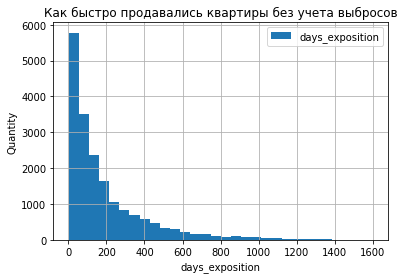

In [137]:
df_filter_day.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
plt.title("Как быстро продавались квартиры без учета выбросов")
plt.xlabel("days_exposition")
plt.ylabel("Quantity")
plt.show()

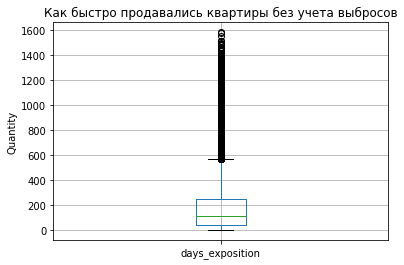

In [138]:
df_filter_day.boxplot('days_exposition',grid=True)
plt.title("Как быстро продавались квартиры без учета выбросов")
plt.ylabel("Quantity")
plt.show()

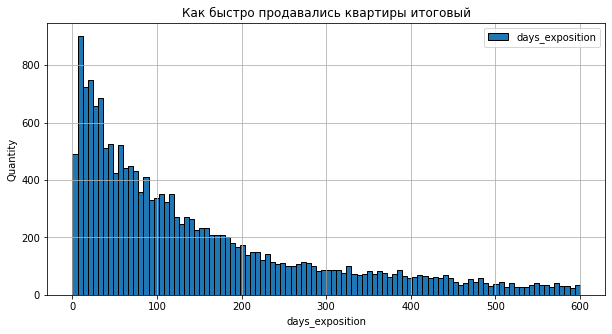

In [139]:
df_filter_day.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, range = (0,600), figsize = (10,5), title = 'Как быстро продавались квартиры итоговый',ec='black')
plt.xlabel("days_exposition")
plt.ylabel("Quantity")
plt.show()

После того,как мы убрали выбросы, мы получили большие значения среднего и медианы (191 и 110), вместо 180 и 95 соответственно.

Если считать без аномалий, то попробуем ответить на вопрос: 
Какие продажи можно считать быстрыми, а какие — необычно долгими?

Быстрыми можно считать продажи, которые продаются в моменте, минимальное значение нашей выборки от 1 - 41 дней.
Необычно долгими,исходя из таблица с усами, считаем объявления, которые висят дольше 600 дней.

### Задача 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта(last_price)?

#### Зависит ли цена от общей площади (total_area м2)
Мы уже ранее посчитали стоимость 1м2, данные в переменной price_one_square_meter

Построим сводную таблицу и график:

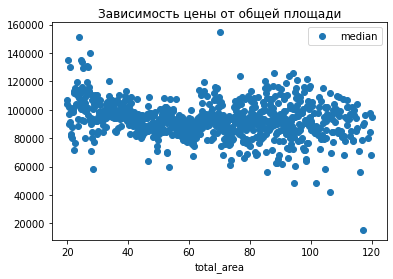

In [140]:
price_total_area = df_filter.pivot_table(index='total_area', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_total_area.columns = ['mean','count','median']
price_total_area.plot(y = 'median', style = 'o', title = 'Зависимость цены от общей площади');


Построим график с помощью sns.pairplot

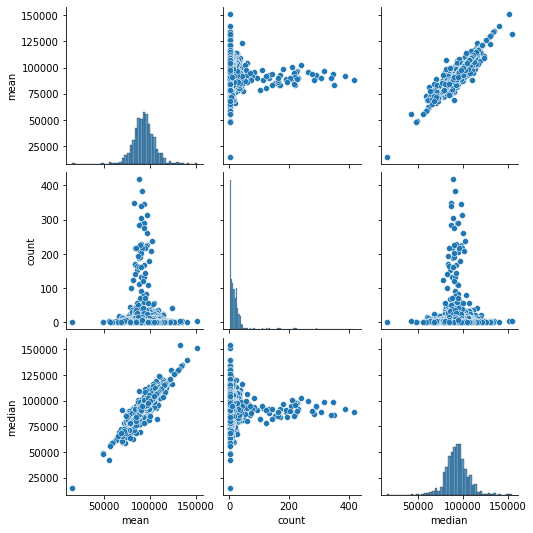

In [160]:
sns.pairplot(price_total_area,kind='scatter');

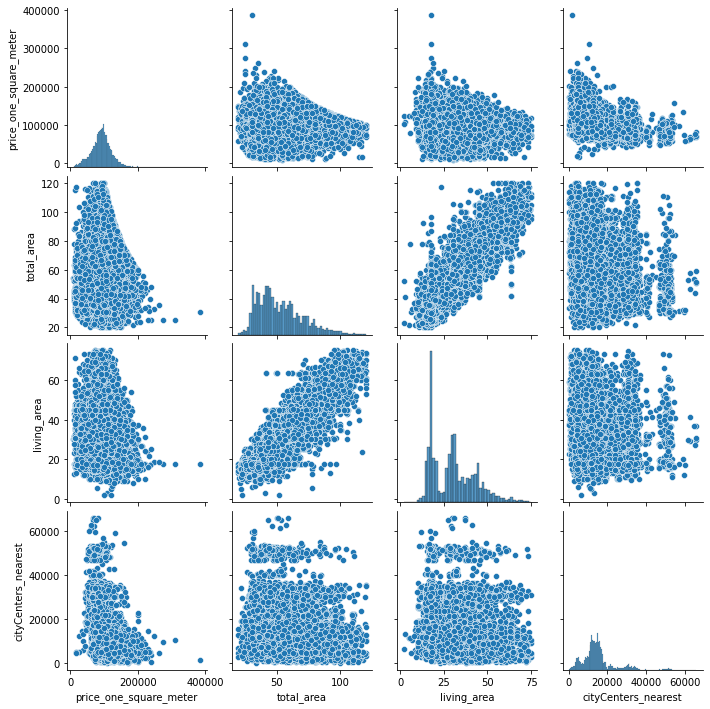

In [159]:
sns.pairplot(df_filter[['price_one_square_meter', 'total_area', 'living_area', 'cityCenters_nearest']])

In [142]:
#посмотрим корреляцию
df_filter['total_area'].corr(df['price_one_square_meter'])

-0.0651177062690603

**Вывод:**
Зависимость цены от общей площади очень слабая,корреляция Пирсона у нас всего 0.06. т.е. чем больше площадь тем немного выше стоимость.

#### Зависит ли цена от жилой площади (living_area)

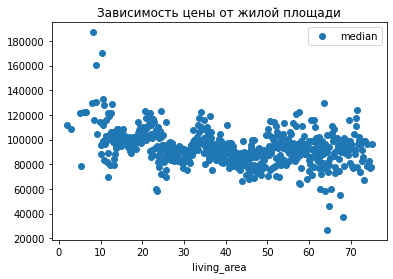

In [143]:
price_living_area = df_filter.pivot_table(index='living_area', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_living_area.columns = ['mean','count','median']
price_living_area.plot(y = 'median', style = 'o')
plt.title("Зависимость цены от жилой площади")
plt.show()

In [144]:
#посмотрим корреляцию
df_filter['living_area'].corr(df['price_one_square_meter'])

-0.1632627843774144

**Вывод:**
Зависимость цены от жилой площади очень слабая,корреляция Пирсона у нас всего 0.2. т.е. чем больше жилая площадь тем немного выше стоимость.
Корреляция ниже, чем у общей площади.

#### Зависит ли цена от площади кухни (kitchen_area)

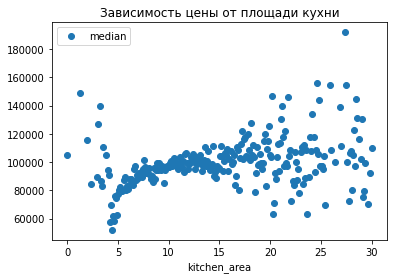

In [145]:
price_kitchen_area = df_filter.pivot_table(index='kitchen_area', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_kitchen_area.columns = ['mean','count','median']
price_kitchen_area.plot(y = 'median', style = 'o')
plt.title("Зависимость цены от площади кухни")
plt.show()

In [146]:
#посмотрим корреляцию
df_filter['kitchen_area'].corr(df['price_one_square_meter'])

0.20842669805038874

**Вывод:**
Зависимость цены от площади кухни слабая,корреляция Пирсона у нас всего 0.21. т.е. чем больше площадь кухни, тем немного выше стоимость.
Корреляция выше, чем у общей площади и жилой, предположительно, что хозяйки любят большую кухню)

#### Зависит ли цена от количества комнат (rooms)

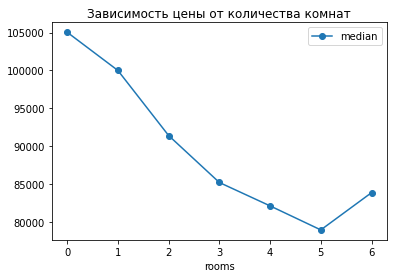

In [147]:
price_rooms = df_filter.pivot_table(index='rooms', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_rooms.columns = ['mean','count','median']
price_rooms.plot(y = 'median', style = '-o')
plt.title("Зависимость цены от количества комнат")
plt.show()

In [148]:
#посмотрим корреляцию
df_filter['rooms'].corr(df['price_one_square_meter'])

-0.2239308542235138

In [149]:
#посмотрим корреляцию c выбросами
df['rooms'].corr(df['price_one_square_meter'])

0.055668540689279705

**Вывод:**
Зависимость цены от количества комнат нет,корреляция Пирсона у нас всего 0.036.
Чем ближе количество комнат к 3, тем ниже стоимость квадратного метра. Возможно из-за того, что чаще берут 1 и 2х комнатные квартиры, далее цена растет в зависимости от количества комнат

#### Зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой) - categorize_floor

,mean,count,median
categorize_floor,,,
другой,96176.611423,15670,96153.0
первый,78684.220014,2768,80161.5
последний,83551.868270,2953,84973.0


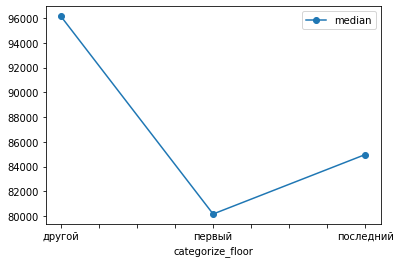

In [150]:
price_categorize_floor = df_filter.pivot_table(index='categorize_floor', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_categorize_floor.columns = ['mean','count','median']
price_categorize_floor.plot(y = 'median', style = '-o')
price_categorize_floor

**Вывод:**
Видно, что цена первого этажа самая низкая, разница составляет примерно 10% с последним этажом. Предпочтительние другие этажи для продажи

#### Зависит ли цена от даты размещения (день недели, месяц, год)

,mean,count,median
weekday,,,
0,92045.175983,3256,92564.5
1,92820.758120,3787,93387.0
2,92669.863483,3560,93438.0
3,91834.701823,3840,92783.5
4,92325.101210,3636,92531.5
5,90747.074221,1765,91245.0
6,91784.202973,1547,92558.0


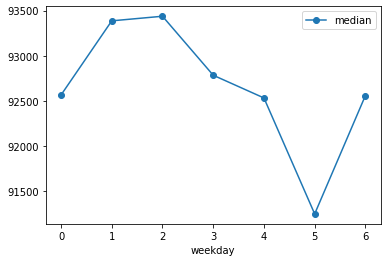

In [151]:
price_weekday = df_filter.pivot_table(index='weekday', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_weekday.columns = ['mean','count','median']
price_weekday.plot(y = 'median', style = '-o')
price_weekday

**Вывод:**
Видно, цена максимальная во вторник и самая низкая в субботу и воскресенье. Скорее всего связано с ранее найденной зависимостью, что активность людей самая высокая в будни(максимум приходится также на вторник) и низкая в выходные

,mean,count,median
month,,,
1,92051.174721,1345,92857.0
2,91587.477481,2398,92969.5
3,92328.355100,2343,92857.0
4,93941.595249,2147,94594.0
5,92088.839020,1143,90909.0
6,89801.447649,1595,90588.0
7,92035.861367,1522,92944.5
8,93126.319216,1582,94040.0
9,93351.459932,1772,93664.5


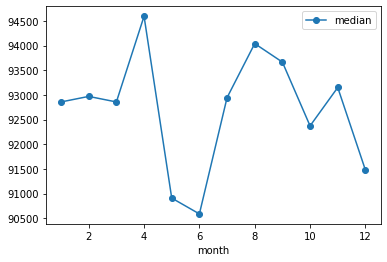

In [152]:
price_month = df_filter.pivot_table(index='month', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_month.columns = ['mean','count','median']
price_month.plot(y = 'median', style = '-o')
price_month

**Вывод:**
Cамая высокая стоимость кв. метра в апреле и августе. Самая низкая стоимость в мае и июне. 
Присутствует аналогия с количеством объявлений, которые мы изучали ранее. 
Скорее всего, как и во многих сферах, присутствует сезонность, спад наблюдается с приходом лета и приближением нового года.


,mean,count,median
year,,,
2014,95301.082353,85,94736.0
2015,91060.938197,987,90410.0
2016,89595.455578,2465,89873.0
2017,90436.360539,7425,90322.0
2018,92403.485069,7836,94124.5
2019,99197.789047,2593,101199.0


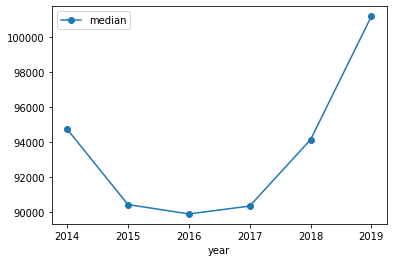

In [153]:
price_year = df_filter.pivot_table(index='year', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_year.columns = ['mean','count','median']
price_year.plot(y = 'median', style = '-o')
price_year

Самая большая стоимость была в 2014г, затем спад до 2016 и дальнейшей рост.
Посмотрим,по месяцам, что происходило в 2014г

In [154]:
price_year_2014 = df_filter.query('year==2014').pivot_table(index='month', values='price_one_square_meter', aggfunc=['mean', 'count','median'])
price_year_2014

,mean,count,median
,price_one_square_meter,price_one_square_meter,price_one_square_meter
month,,,
11,118033.875000,8,104478
12,92939.233766,77,93250


Есть данные только за ноябрь и декабрь, всплеск роста наблюдался из-за экономического кризиса 2014г.


**Вывод:**
Видим, что в связи с экономическим кризисом в 2014 году был сильный рост цен на недвижимость, далее цена падала до 2016г и далее заметен рост. Данные авборки с 2014-2019г.


### Задача 4.Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Эти данные можно найти по имени в столбце locality_name.

In [155]:
#построим сводную
price_locality = df_filter.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc=['mean', 'count'])
price_locality.columns = ['mean','count']
price_locality.sort_values('count', ascending = False).head(10)


,mean,count
locality_name,,
санкт-петербург,105844.146209,13597
мурино,85628.079855,551
шушары,78606.198157,434
всеволожск,67157.176020,392
колпино,75221.197015,335
пушкин,100355.407186,334
парголово,90333.168712,326
гатчина,68663.531353,303
кудрово,92476.414141,297


**Вывод:**

Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра:

Самая высокая стоимость квадратного метра: Санкт-Петербург, а самая низкая в Выборге


### Задача 5. Опишите, как стоимость объектов зависит от расстояния до центра города.

Описание задачи:

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Приступим:

Мы посчитали расстояние до центра в километрах - cityCenters_nearest_km. 
В cityCenters_nearest_km пропуски мы заменили на число 999, так как максимальное значение в данных у нас 66 км, в дальнейшем мы будем исключать эти значения

In [156]:
#проверим, что пропусков нет
print('Пропущенных значений', df_filter['cityCenters_nearest_km'].isna().sum())

Пропущенных значений 0


In [157]:
df_filter['cityCenters_nearest_km'].describe()

count    21391.000000
mean       265.048572
std        428.482161
min          0.000000
25%         12.000000
50%         16.000000
75%        999.000000
max        999.000000
Name: cityCenters_nearest_km, dtype: float64

,mean,count
cityCenters_nearest_km,,
0.0,119157.500000,10
1.0,119969.831683,101
2.0,117484.315152,165
3.0,110933.372385,239
4.0,116572.658482,448
5.0,121389.386364,572
6.0,123119.751232,406
7.0,117086.815331,287
8.0,116066.956616,461


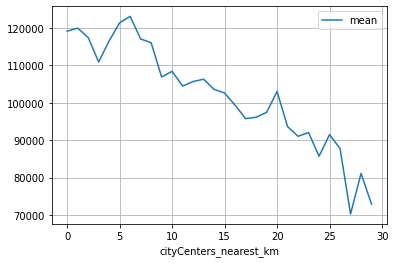

In [158]:
price_city_km = df_filter.query('locality_name == "санкт-петербург" and cityCenters_nearest_km !=999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_one_square_meter', aggfunc=['mean', 'count'])
price_city_km.columns = ['mean','count']
price_city_km.plot(y = 'mean', style = '-', grid=True)
price_city_km


**Вывод:**
Чем дальше объект находится от центра города, тем стоимость квартиры будет ниже.
Мы видим, что стоимость недвижимости не равномерно спускается,есть пик в районе 6-7 км, скорее всего в этой области могут находится элитные районы, который влияет на рост цены


## Общий вывод

Было проведено исследование, чтобы выявить влияние разных факторов на рынок недвижимости. Входные данные от сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Перед проведением исследования былы поставлены несколько задач:

Задача 1: Изучить, параметры объектов в данных;

Задача 2: Изучить, как быстро продавались квартиры;

Задача 3: Узнать, какие факторы больше всего влияют на общую (полную) стоимость объекта;

Задача 4: Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;

Задача 5: Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Узнать, как стоимость объектов зависит от расстояния до центра города;


Перед тем как приступить к решению задач, мы проанализировали наши данные, выборка была сырой, в ней присутствовало много выбросов и пропущенных значений.

 * В результате исследования мы скорректировали следующие значения:

|| Столбец | Изменения  | 
|:--:|:----------------:|:---------------:|
|1| ceiling_height        | убрали все пропуски и аномалии и заменили их медианной         |
|2| floors_total              | удалили пропущенные значения          |
|3| first_day_exposition          | изменили тип данных на datetime        |
|4| is_apartment         | заменили пропущенные значения на False          |
|5| balcony      | заменили пропуски на 0     |
|6| kitchen_area       | заменили пропуски медианной в зависимости от кол-ва комнат         |
|7| living_area      | заменили пропуски медианной в зависимости от кол-ва комнат       |
|8| locality_name      | убрали неявные дубликаты, пропуски заменили на unknown         |


* Изменили типы данных в столбцах для корректности вычислений.

| int | float | datetime64 | 
|:----------------:|:---------------:|:---------------:|
|   floors_total     | total_area          |first_day_exposition |
|   balcony    |   living_area        | |
|   last_price     |  kitchen_area          | |
|        |  ceiling_height         | |
|        |  картографические        | |

* Добавили новые столбцы для дальнейшего исследования

| столбец | переменная  | 
|:----------------:|:---------------:|
|   Цена одного квадратного метра    | price_one_square_meter          |
|   День недели публикации    | weekday          |
|   Месяц публикации   | month         |
|   Год публикации    | year          |
|   Тип этажа квартиры    | categorize_floor          |
|   Расстояние до центра города в км.    | cityCenters_nearest_km          |


После приступили в анализу данных в рамках задач, которые перед нами стояли.

1. Задача: Изучить, параметры объектов в данных;

В результате детального анализа каждого параметра в некоторых данных были выявлены аномалии/выбросы в данных, которые мы исключили и выбрали для параметров новые диапазоны данных. 
Построили диаграммы для каждого параметры и проанализировали.


|| Столбец | Новый диапазон  | Наблюдения|
|:--:|:----------------:|:---------------:|:---------------|
|1|   total_area      |   20-120 м2         | Общая площадь имеет разброс данных от 12 м2. до 900 м2. среднее значение 60 м2, а медиана 52 м2 Большая часть квартир имеет метраж от 30 до 80 м2|
|2|  living_area      |    2-75 м2         | Жилая площадь имеет разброс данных от 2 м2. до 145 м2. среднее значение 31 м2, а медиана 30 м2 Наблюдается 2 пика с наиболее часто встречающимися значениями 18 и 30 м2.|
|3|  kitchen_area      |   0-30 м2       | Площадь кухни имеет разброс данных от 0 м2. до 112 м2. среднее значение и медиана 9 м2. Самое часто встречающееся значение 9 м2.|
|4|  last_price      |    0-12 млн.руб       | Стоимость сильно разбросана, есть варианты за 12 тыс.руб. и за 763 млн.руб. Большая часть цен на объекты находятся в диапазоне от 3 до 12 млн. Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб.|
|5|   rooms      |    0-6 комнат       |Количество комнат в диапазоне от 1 до 19. Больше всего 1-2х квартир. Медиана и среднее 2. Чуть меньше трехкомнатных, остальных комнат на порядок ниже |
|6|   ceiling_height     |         | Первоначально высота потолков была в диапазоне от 1 до 100. Медиана и среднее у нас 2.7м. Чаще всего встречаются потолки от 2.5-2.7 до 3м. Остальные случаи редкие|
|7|   categorize_floor    |         | Из всей выборки данных квартиры распределены следующим образом: первый этаж 12.3%, последний 14.1%, и другие 73.5%|
|8|   floors_total     |         | Общее количество этажей в доме находятся в диапазоне от 1-60эт. Среднее 10эт, медиана 9эт. Чаще всего встречаются 5эт дома.|
|9|   cityCenters_nearest     |         |Мы не заменяли пропущенные значения в картографических данных. Разброс от 181м-65968м. Среднее и медиана не сильно отличаются, 14185м и 13093м соответственно, большая часть квартир находится в диапазоне 9000-16000 м. |
|10|   airports_nearest     |         |  Разброс от 0м-84869м. Среднее и медиана не сильно отличаются, 28788м и 26726м соответственно, большая часть квартир находится в диапазоне 18000-37000 м.|
|11|   parks_nearest     |         | Разброс от 1м-390м. Среднее и медиана не сильно отличаются, 490м и 450м соответственно, большая часть квартир находится в диапазоне 180-700 м.|
|12|   weekday     |         | в будни люди чаще выставляют объявления, а на выходных почти в два раза меньше.|
|13|   month     |         | Наблюдается динамика, что активно выкладывать обявления начинают после новогодних праздников(декабрь,январь), пик приходится на февраль месяц-11.2%, дальше самый большой спад в мае-5.4%|



2. Задача: Изучить, как быстро продавались квартиры;

Проанализировали данные и обнаружили большое количество выбросов, а также аномальные значения в днях снятия объявления с продажи на 45,60,90 дни.
Возможно это как то связано с системой размещения объвлений, например, прозвон с уточнением актуальности объявления или автоматически,как в авито, оно закрывается.
Ввели новый диапазон без выбросов: 0-600 дней

Получили следующие результаты:

| Значение | Результат (дни) | 
|:----------------:|:---------------:|
|   Среднее время продажи   | 191          |
|   Медианное значение    | 110         |
|   Быстрые продажи    | 1-41          |
|   Необычно долгие   | дольше 600          |



3. Задача: Узнать, какие факторы больше всего влияют на общую (полную) стоимость объекта;

Мы проанализировали ряд параметрова, чтобы выяснить, как они влияют на стоимость квартиры:


| Параметр | Влияние | 
|:----------------:|:---------------|
|   Общая площадь  | очень слабая,корреляция Пирсона у нас всего 0.1. т.е. чем больше площадь тем немного выше стоимость.         |
|   жилая площади    | корреляция Пирсона 0.2, стоимость растет, но очень слабо         |
|   Площадь кухни    | корреляция Пирсона 0.21,  выше, чем у общей площади и жилой, предположительно, что покупатели любят большую кухню          |
|   Количество комнат   | Чем ближе к 5, тем ниже стоимость кв.м. Возможно из-за того, что чаще берут 1-2х ком. кв-ры, после 4 цена растет с ростом числа комнат          |
|  Этажность   | На первом этаже квартира самые дешевые, чуть дороже на последним, чаще берут другие этажи         |
|  День размещения  |   активность людей самая высокая в будни(максимум приходится также на вторник) и низкая в выходные     |
|  Месяц размещения   |   спад наблюдается с приходом лета и приближением нового года.     |
| Год размещения   |   в 2014 году был сильный рост цен на недвижимость, далее цена падала до 2016г и далее заметен рост. Данные авборки с 2014-2019г.       |



Мы подтвердили логичный рост стоимости от площади помещения, но зависимость слабая.
Увидели, что с ростом числа комнат, стоимость растет не пропорционально, на нее также влияет спрос на квартиры. т.к. чаще берут 1-2х комнатные квартиры, стоимость кв.м. у них выше, чем у 3х комн-ой. Квартиры с большим количеством комнат берут реже, у них уже мы наблюдаем пропорциональный рост стоимости от количества комнат. 

Покупатели предпочитают квартиры не на последнем и не на первом этаже и проявляют активность больше в будни. Также на стоимость квартиры влияет сезонность, экономические кризисы и в целом ситуация по стране.

В итоге можно сделать вывод, что стоимость квартиры складывается из многих параметров,каждый по своему влияет на цену. В рамках данного анализа мы рассмотрели только часть из них, но существует еще много факторов, которые могут повлиять на общую стоимость квартиры: планировка, ремонт, расположение детских садов, площадок больниц  и т.д.



4. Задача: Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;

| Населенный пункт | Средняя стоимость | Количество|
|:----------------:|:---------------:|:--:|
|санкт-петербург|	114613.462221	|15564|
|мурино	|85629.172101	|552|
|шушары	|78551.505695	|439|
|всеволожск	|68654.894472	|398|
|пушкин|	103100.451087|	368|
|колпино	|75332.620178	|337|
|парголово|	90333.168712	|326|
|гатчина	|68745.641694	|307|
|кудрово	|92471.528428|	299|
|выборг	|58141.345992	|237|


Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

5. Задача: Выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра. Узнать, как стоимость объектов зависит от расстояния до центра города;

Чем дальше объект находится от центра города, тем стоимость квартиры будет ниже. Мы видим, что стоимость недвижимости не равномерно спускается,есть пик в районе 6-7 км, скорее всего в этой области могут находится элитные районы, который влияет на рост цены
